In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings('ignore')

# $pip install pandas
os.chdir("F:/HackRx5/techiesss-hackrx/model/training_model")

plt.style.use('ggplot')


In [123]:
# !pip install scikit-learn==1.5.2



[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     --------------------------------------- 0.0/11.0 MB 325.1 kB/s eta 0:00:34
     --------------------------------------- 0.1/11.0 MB 651.6 kB/s eta 0:00:17
      --------------------------------------- 0.2/11.0 MB 1.0 MB/s eta 0:00:11
     - -------------------------------------- 0.4/11.0 MB 1.6 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/11.0 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/11.0 MB 3.3 MB/s eta 0:00:03
     ------- -------------------------------- 1.9/11.0 MB 5.3 MB/s eta 0:00:02
     ------- -------------------------------- 1.9/11.0 MB 5.3 MB/s eta 0:00:02
     ------- -------------------------------- 1.9/11.0 MB 5.3 MB/s eta 0:00:02
     --------- ------------------------------ 2.6/11.0 MB 5.4 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/11.0 MB 5.3 M

In [124]:
df = pd.read_csv('insurance_claims.csv')

df.replace('?', np.nan, inplace = True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [125]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [127]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [128]:
# !pip install missingno

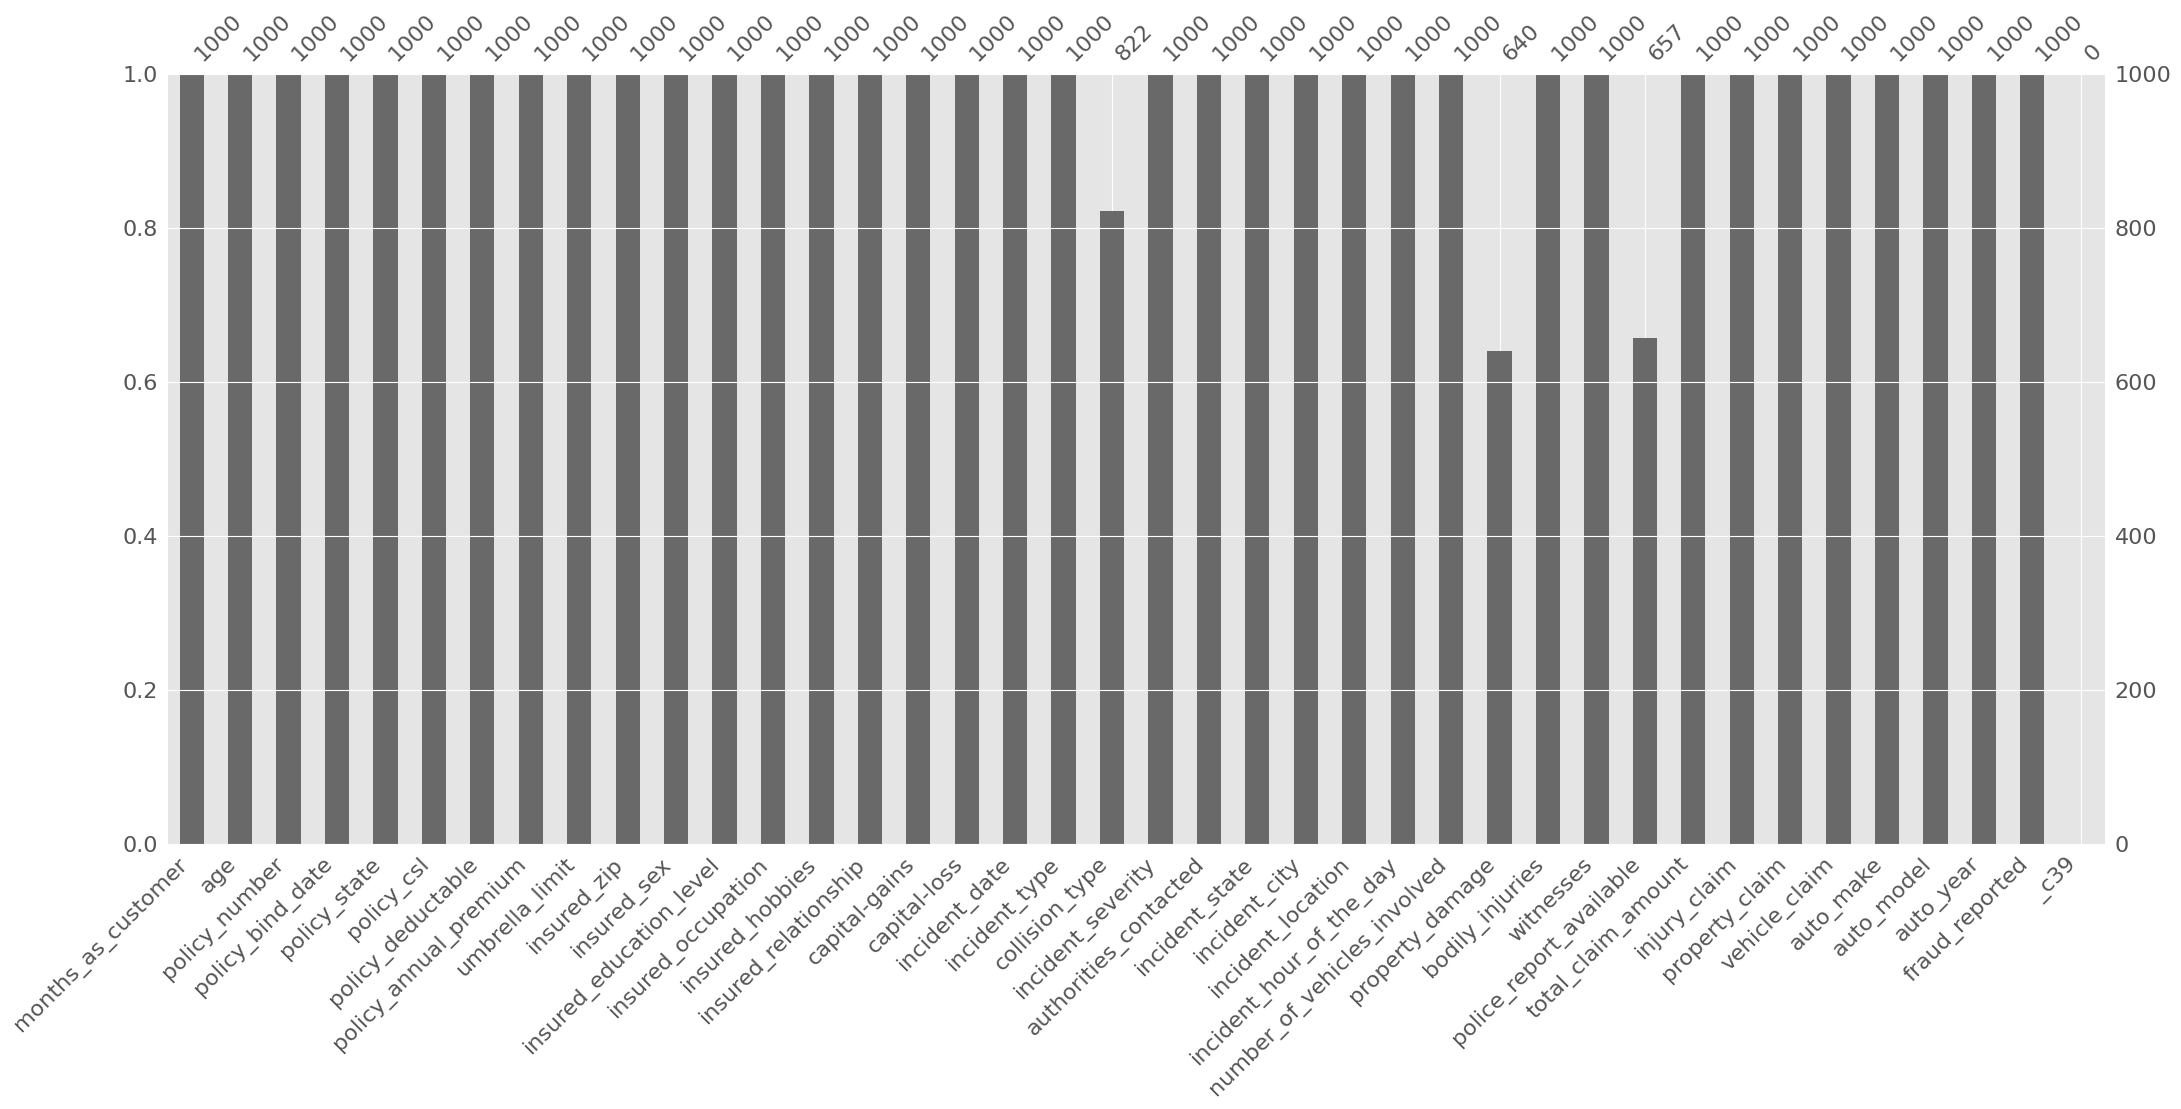

In [129]:
import missingno as msno

msno.bar(df)
plt.show()

In [130]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [131]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

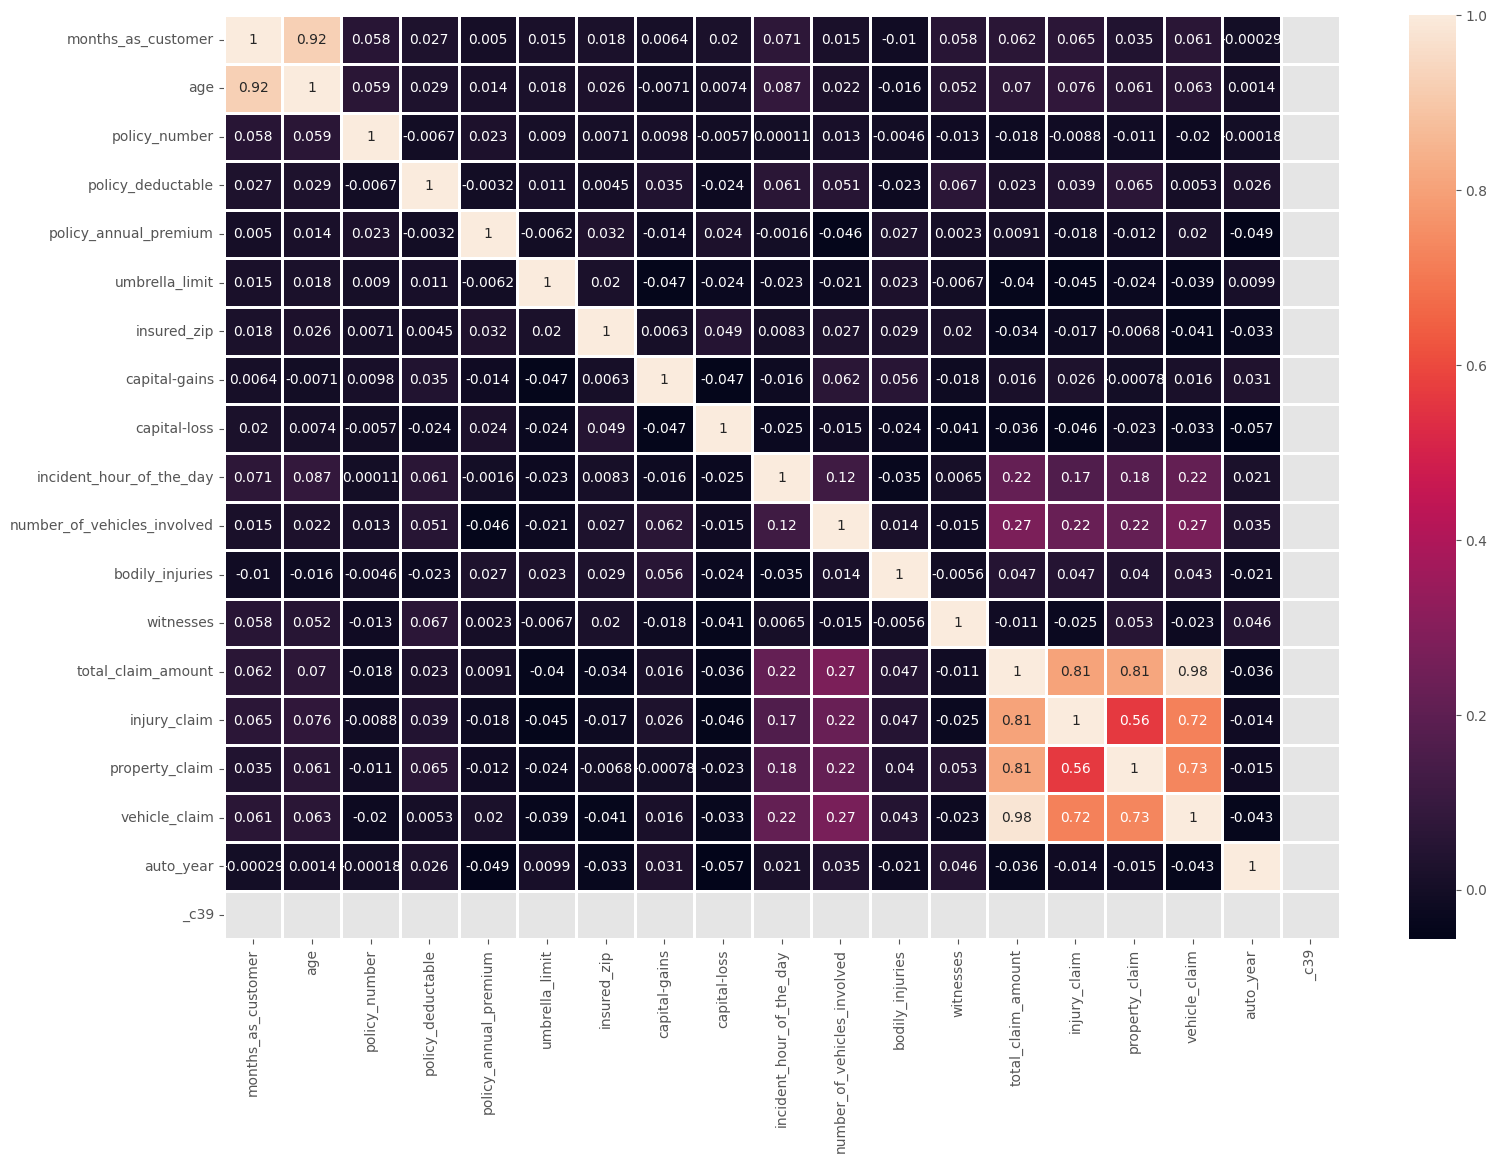

In [132]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [133]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [134]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)


In [135]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


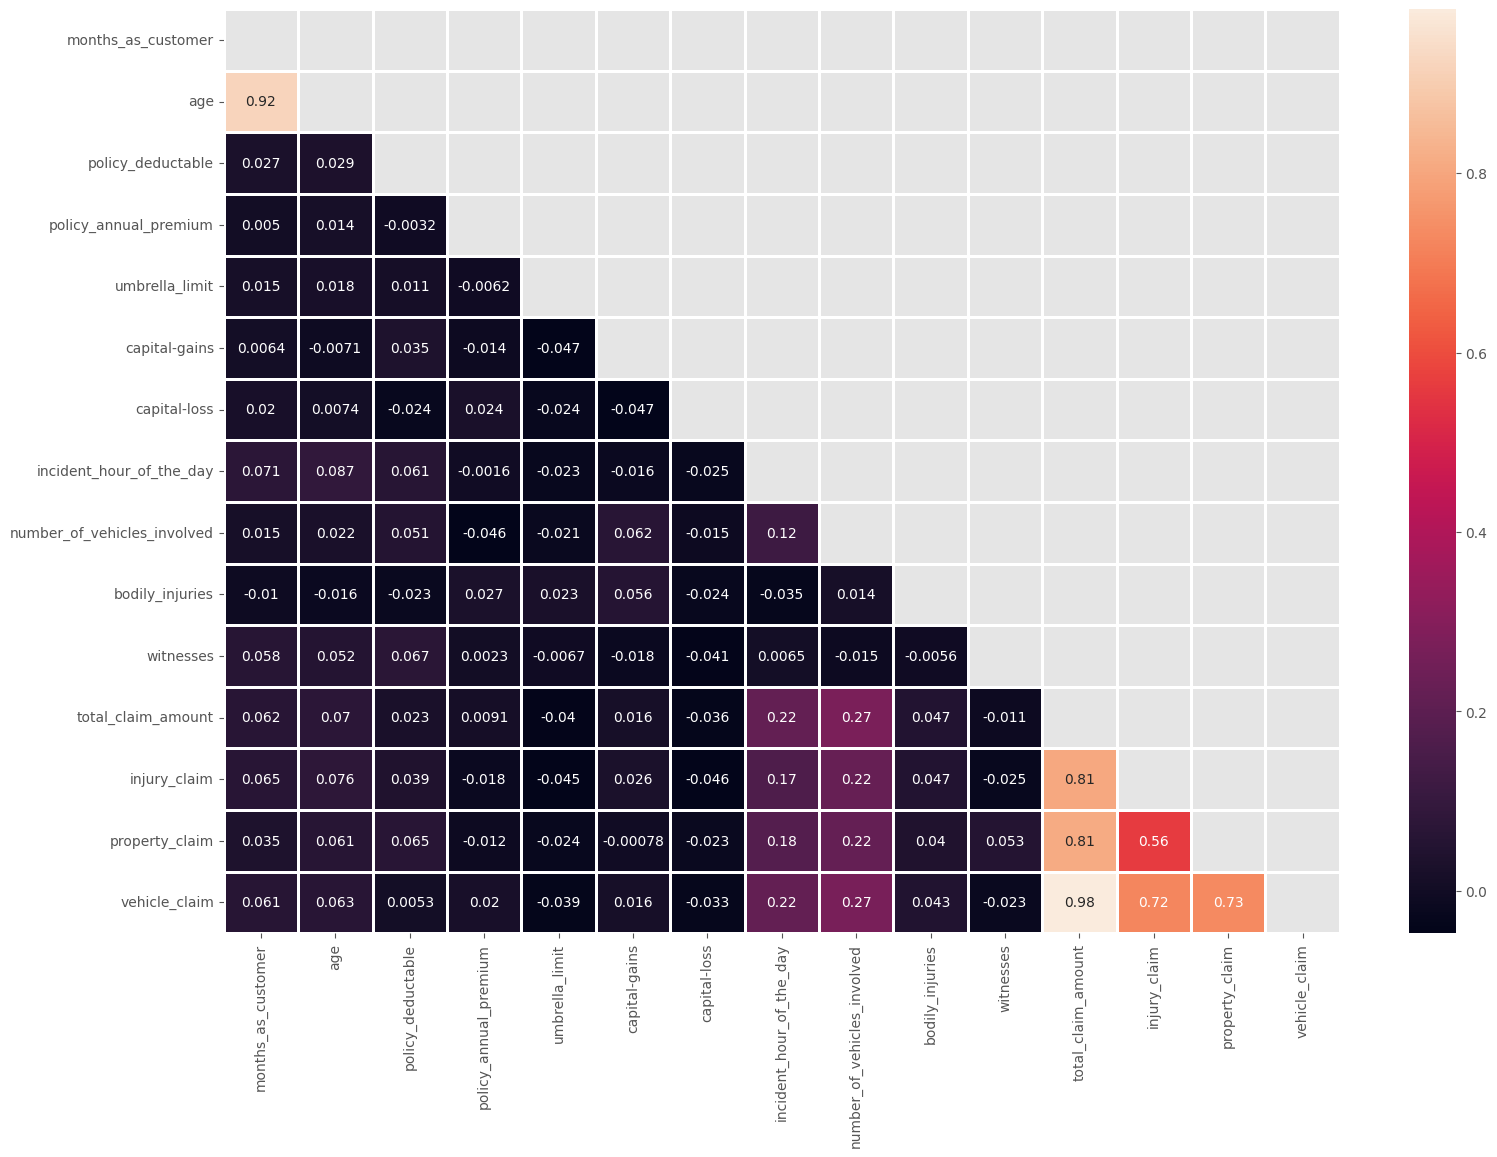

In [136]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [137]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [138]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [140]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [141]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [142]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [143]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [144]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [145]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [146]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [147]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [148]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [149]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [150]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


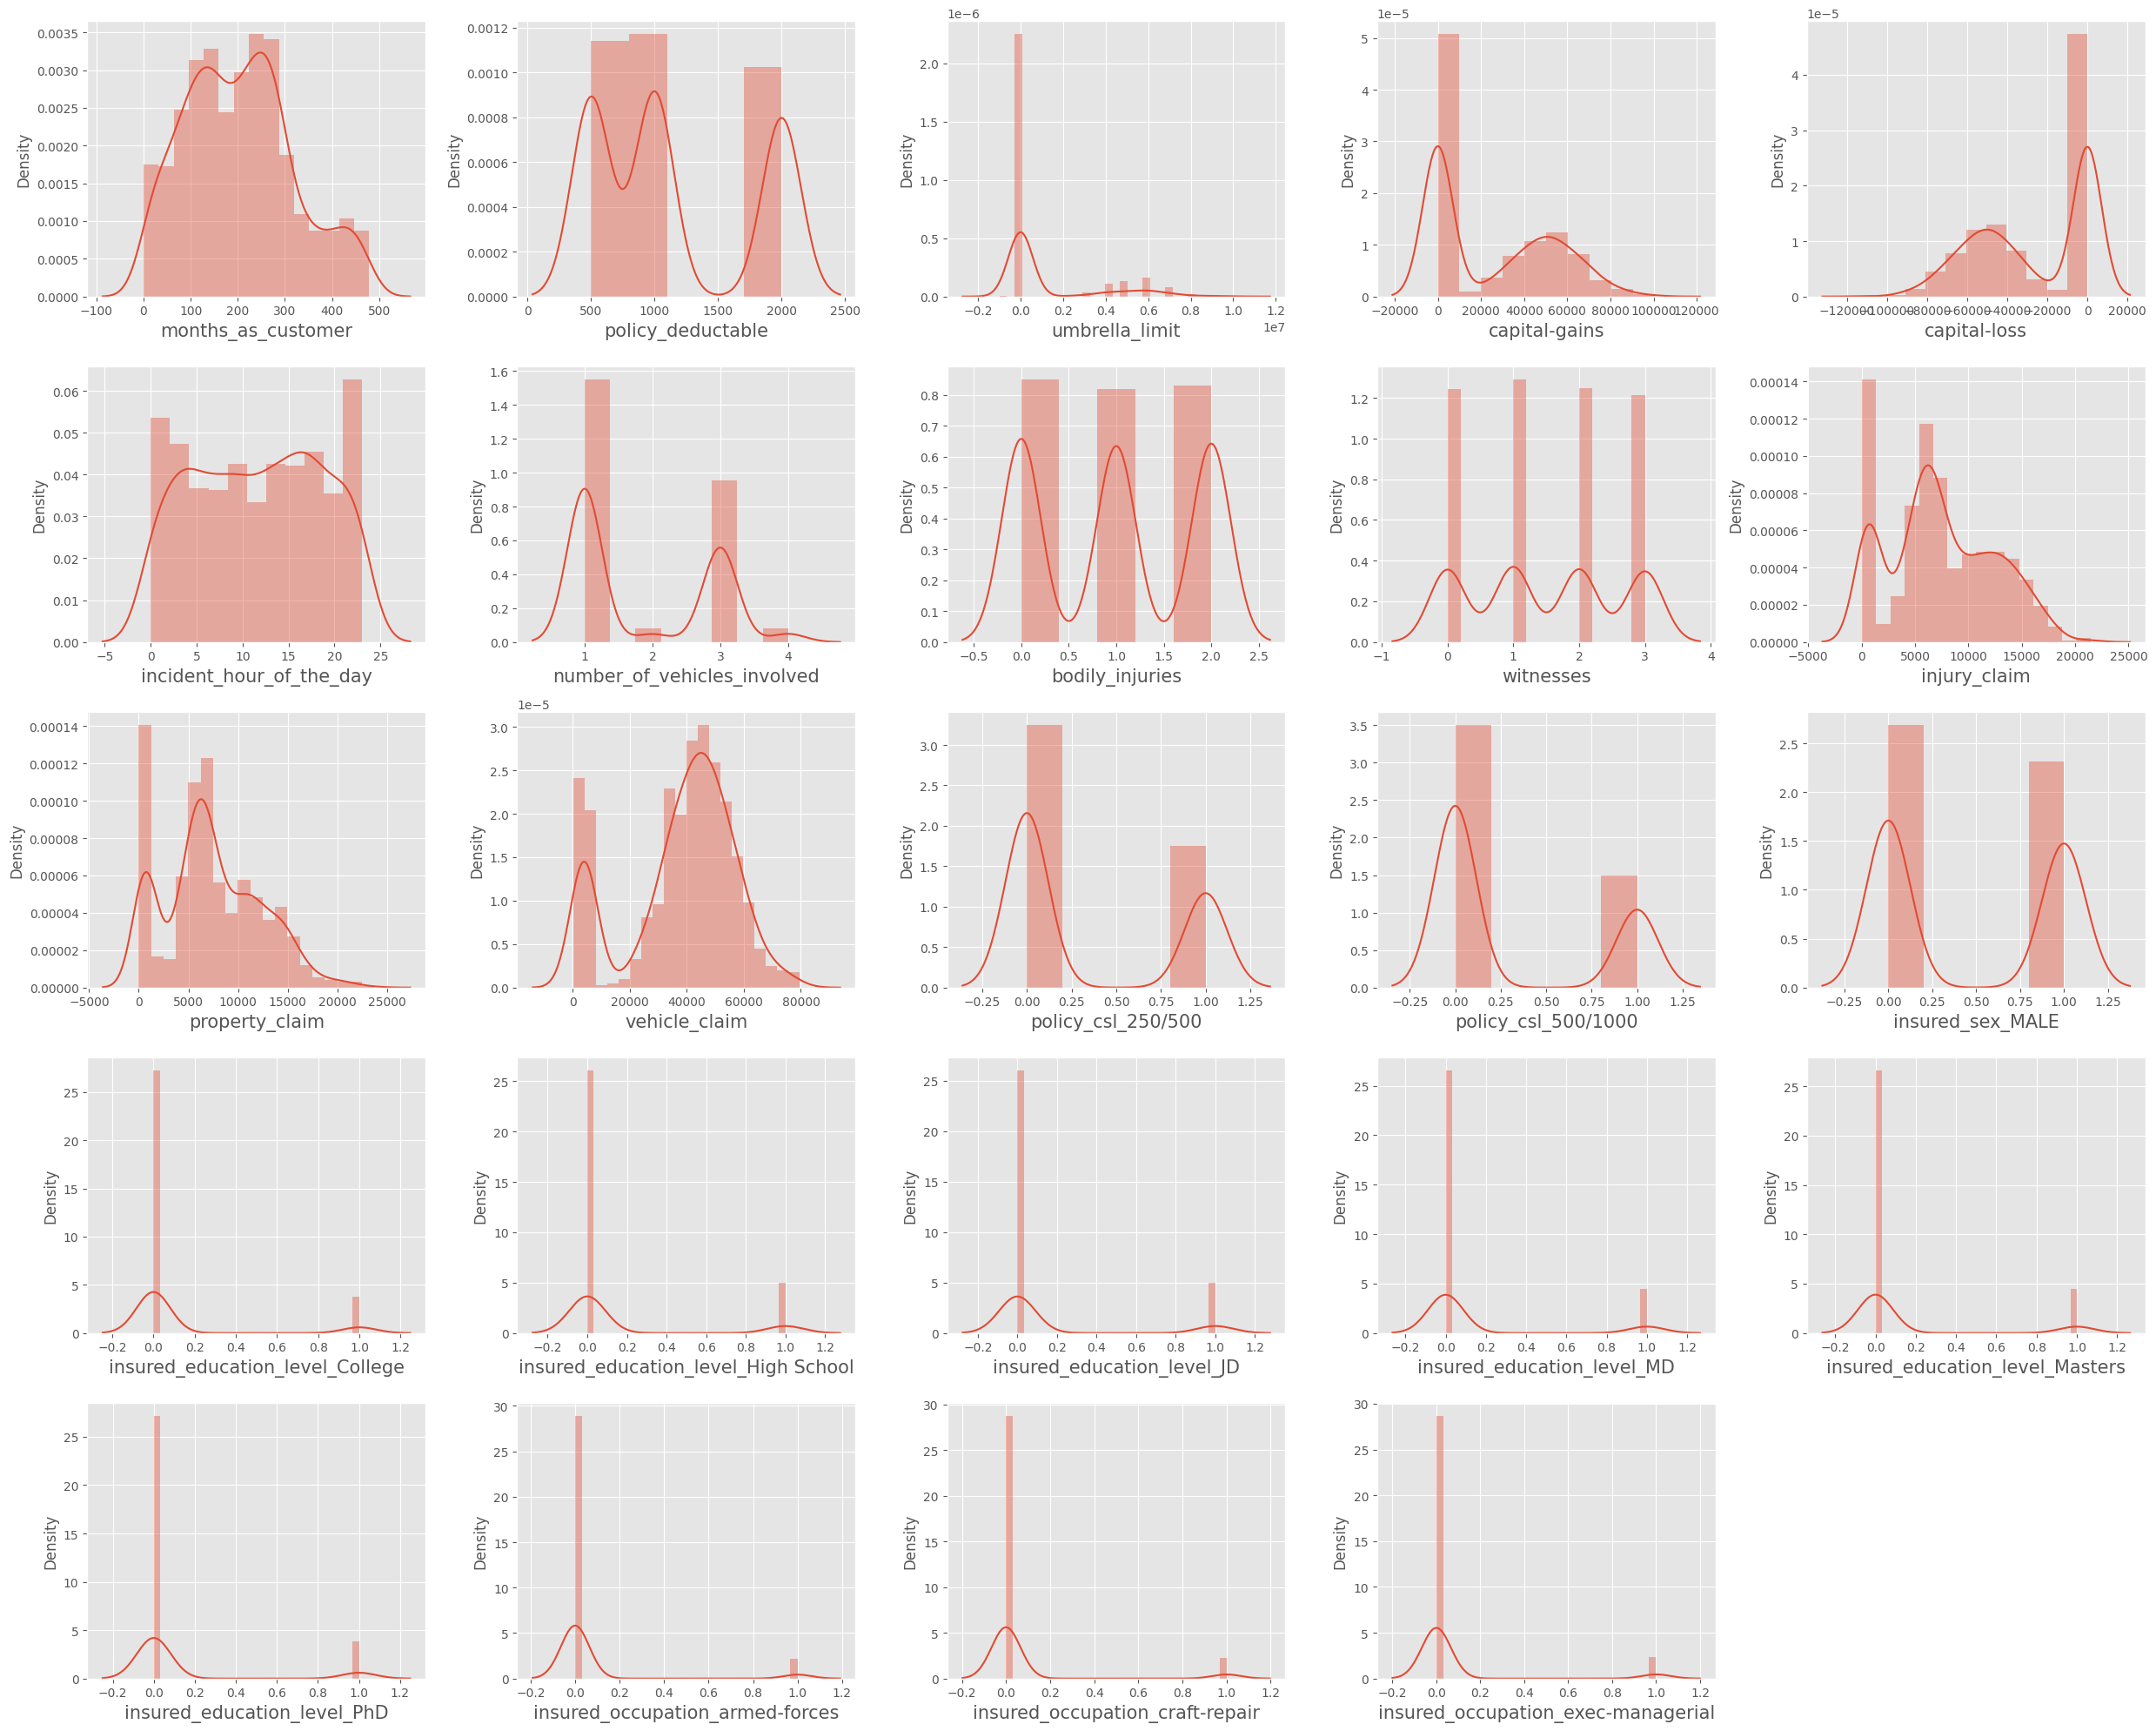

In [151]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

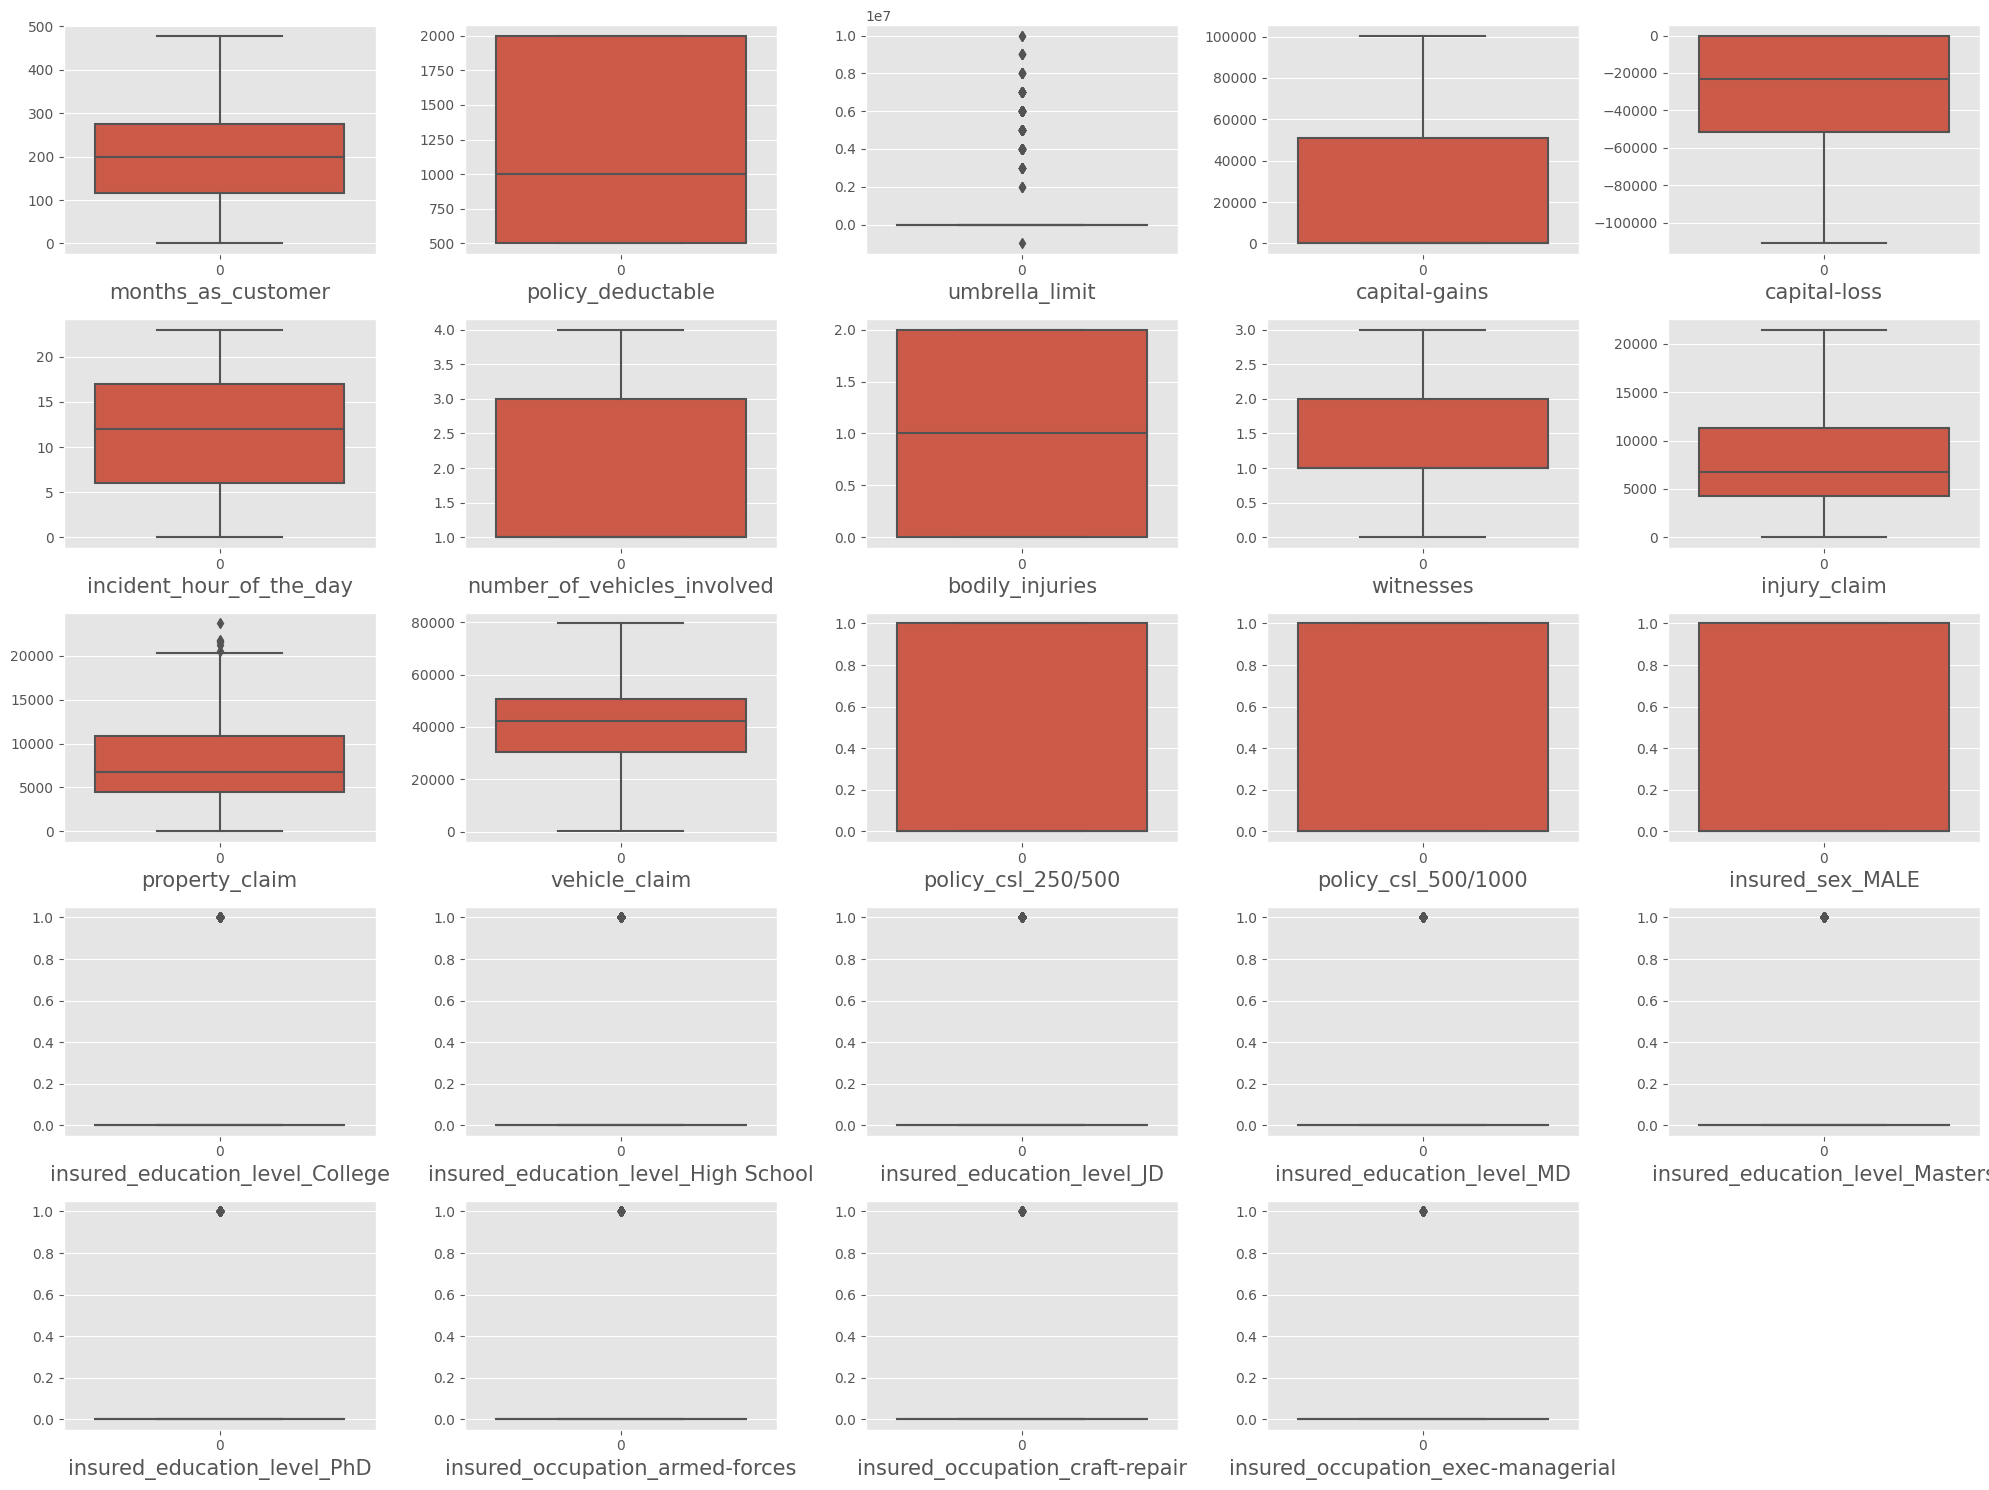

In [152]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [153]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [154]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
7,165,1000,0,0,0,23,3,2,2,9380,...,0,0,1,0,0,0,0,1,0,1
584,96,1000,0,0,0,4,1,1,2,670,...,0,0,0,1,0,0,0,1,0,0
293,147,1000,0,0,-48300,13,1,2,2,15540,...,1,1,0,0,1,0,0,0,1,0
281,186,1000,0,37600,-37600,3,1,2,1,860,...,0,0,0,1,0,0,0,1,0,0
707,152,1000,0,0,0,2,1,0,2,7510,...,0,1,0,0,0,0,0,0,1,0


In [155]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [156]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [157]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
7,-0.329555,-0.206032,-0.491486,-0.903462,0.957153,1.590897,1.156388,1.239163,0.480175,0.410291,0.417174,-0.266379
584,-0.919531,-0.206032,-0.491486,-0.903462,0.957153,-1.142108,-0.808031,0.008206,0.480175,-1.372131,-1.380775,-1.734478
293,-0.483461,-0.206032,-0.491486,-0.903462,-0.745820,0.152473,-0.808031,1.239163,0.480175,1.670879,1.688743,1.669174
281,-0.149997,-0.206032,-0.491486,0.451976,-0.368557,-1.285951,-0.808031,1.239163,-0.415674,-1.333249,-1.341555,-1.822126
707,-0.440709,-0.206032,-0.491486,-0.903462,0.957153,-1.429793,-0.808031,-1.222750,0.480175,0.027613,0.031162,1.547093


In [158]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [159]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [160]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
7,-0.329555,-0.206032,-0.491486,-0.903462,0.957153,1.590897,1.156388,1.239163,0.480175,0.410291,...,0,0,1,0,0,0,0,1,0,1
584,-0.919531,-0.206032,-0.491486,-0.903462,0.957153,-1.142108,-0.808031,0.008206,0.480175,-1.372131,...,0,0,0,1,0,0,0,1,0,0
293,-0.483461,-0.206032,-0.491486,-0.903462,-0.745820,0.152473,-0.808031,1.239163,0.480175,1.670879,...,1,1,0,0,1,0,0,0,1,0
281,-0.149997,-0.206032,-0.491486,0.451976,-0.368557,-1.285951,-0.808031,1.239163,-0.415674,-1.333249,...,0,0,0,1,0,0,0,1,0,0
707,-0.440709,-0.206032,-0.491486,-0.903462,0.957153,-1.429793,-0.808031,-1.222750,0.480175,0.027613,...,0,1,0,0,0,0,0,0,1,0


In [161]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [162]:
# print(X_test)
X_test.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
294,156,500,0,0,-51800,16,4,1,2,5340,...,0,1,0,0,0,0,0,1,0,1
41,116,500,0,0,-24100,1,1,1,1,16180,...,1,0,0,0,0,0,0,1,0,0
404,437,1000,0,48800,0,10,1,1,3,7680,...,0,1,0,0,0,0,1,0,0,0
169,47,2000,0,75400,0,18,1,1,0,670,...,0,1,0,0,0,1,0,0,0,0
439,61,1000,0,0,-66000,10,1,2,1,590,...,0,0,0,1,0,1,0,0,1,1


In [163]:
np.shape(X_test)

(250, 53)

In [164]:
print(X_test.iloc[0].values.tolist())

[156, 500, 0, 0, -51800, 16, 4, 1, 2, 5340, 5340, 42720, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]


In [165]:
len(X_test)

250

In [166]:
print(y_pred)

['N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N

In [167]:
len(y_pred)

250

In [168]:
import joblib

In [169]:
joblib.dump(dtc, 'model.joblib')

['model.joblib']

In [170]:
!pip3 list | findstr scikit

scikit-image                  0.19.3
scikit-learn                  1.5.2
scikit-learn-intelex          20230228.214818



[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.4
anaconda-client               1.11.2
anaconda-cloud-auth           0.5.0
anaconda-navigator            2.6.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.5.2
astroid                       2.12.10
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.2.0
Automat                       20.2.0
autopep8                      1.7.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backport


[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
!python -m venv myenv

In [173]:
!myenv\Scripts\activate

In [174]:
!pip freeze > requirements.txt

In [175]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.544
[[ 89 101]
 [ 13  47]]
              precision    recall  f1-score   support

           N       0.87      0.47      0.61       190
           Y       0.32      0.78      0.45        60

    accuracy                           0.54       250
   macro avg       0.60      0.63      0.53       250
weighted avg       0.74      0.54      0.57       250



In [176]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Unexpected exception formatting exception. Falling back to standard exception


joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\harsh\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute '_passthrough_scorer' on <module 'sklearn.metrics._scorer' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\_scorer.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\harsh\AppData\Local\Temp\ipykernel_19720\2811858912.py", line 13, in <module>
    grid_search.fit(X_train, y_train)
  File "C:\U

In [53]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.8133333333333332


In [177]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [55]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8173333333333334
Test accuracy of Decision Tree is : 0.732
[[143  52]
 [ 15  40]]
              precision    recall  f1-score   support

           N       0.91      0.73      0.81       195
           Y       0.43      0.73      0.54        55

    accuracy                           0.73       250
   macro avg       0.67      0.73      0.68       250
weighted avg       0.80      0.73      0.75       250

